# STATS 131 Project: Kickstarter
Team 15: HALLO

Data: https://www.kaggle.com/kemical/kickstarter-projects/

Presentation:

Members: 
Kai Chen Tan,
Qi Jing Yap,
Yuqing Yang,
Steven Salmeron

# Data Background
## What is Kickstarter?

Kickstarter is a fundraising platform with the goal of helping to “bring creative projects to life”, by providing a way for artists to be funded directly by fans of the project. This is done through a campaign, a page where an artist outlines their project, what its purpose is, how much money they need to complete it and what this money will be used for, how much time they plan on giving the campaign to raise its funding goal, and why people should help fund it, including rewards for pledging certain amounts and potential stretch goals past the initial goal to enhance the project. The platform launched on April 28, 2009 and has seen over 450,000 projects pass through it.

## Basics of a Kickstarter Project

Each campaign has a unique Kickstarter ID used for internal identification, and each project has a name, although this does not have to be unique and only needs to title a project for people to find and refer to it with. A campaign also makes itself easier to distinguish from others through the use of categories. Kickstarter has 15 main categories to choose from: Art, Comics, Crafts, Dance, Design, Fashion, Film & Video, Food, Games, Journalism, Music, Photography, Publishing, Technology, and Theater. Subcategories are also attached to a project to further classify it past the main category. These include one such as footwear, accessories, and jewelry as a few under fashion and games allowing categories based on the style of game. 

People who help fund a project are known as its ‘backers’ and the money they contribute is their ‘pledge’. Backing a project both allows the person to contribute to sometime they wish to see succeed and usually provides a reward if high enough. Rewards are usually tiered to match the amount pledged and often include the project itself when it is some sort of product. Project start with a specific goal for their campaign: an amount the team has determined to be the minimum they need to proceed with the project.Because Kickstarter is a global platform and projects can be started in 22 different countries, not all campaigns are measured in USD. Kickstarter converts non USD currency numbers to USD based on conversion rates at the time of recording for use in their metrics, but does save the original numbers, currency, and country. 

A project has a date and time when it is launched, of course, as well as a deadline: a date and time when the project can longer receiving pledges. A project that reaches its goal by the deadline is a success and receives the pledged funding. Projects that fail to meet their goal receive no funding and Kickstarter will not collect funds from the backers; this is a failed project. This all-or-nothing model is meant to prevent disappointment in scenarios where a team may attempt to proceed with a project when only a tenth of the goal was reached and can no longer meet the standards that backers may have been expecting. More ambitious projects instead set a minimum goal and include stretch goals in their campaign: funding milestones where additional features not exactly necessary for the project will be worked on if reached. Of course, a project can be cancelled early if the team running it decided they would prefer not to continue it. Kickstarter may also suspend a campaign if upon further review, they decide it is in violation of one of their rules. The maximum length for a campaign used to be 90 days but was lowered to 60 during 2011. 

## Our Dataset

The dataset being analyzed here comes from a  Kaggle user, Mickaël Mouillé, and contains information about over 300,000 Kickstarter projects. Variables include most of what is described about projects above. 
- <font color=blue>ID</font> and <font color=blue>name</font>  are self explanatory. 
- <font color=blue>category</font> and <font color=blue>main_category</font> both give the one category and sub category a project is classified under.
    - There are 15 categories, which are listed above. Each one has from 5 to 20 subcategories.
- Currency and country use the abbreviation for the correct country of origin and currency used in the campaign <font color=blue>pledged</font> shows the amount raised in the native currency.
    - <font color=blue>usd_pledged</font>, which is the amount pledged total, and <font color=blue>goal</font>, amount needed to succeed, are both already converted into USD by Kickstarter as detailed above. 
        - The dataset also includes a version of these variables with converstions done by fixer.io, <font color=blue>usd_pledged_real</font> and <font color=blue>usd_goal_real</font>,which we use instead for our analysis.
- <font color=blue>launched</font> and <font color=blue>deadline</font> give the date and time the project was started and ended, respectively, in a “year-month-day hour:minute:second” format. 
- State shows whether the campaign ended successfully, failed, was cancelled, or was suspended. 
    - Some are also labeled as live, meaning the campaign was still ongoing, and undefined. 
The data was directly taken from the Kickstarter website itself and contains data from as early as the websites beginning.


In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
kickstarter = pd.read_csv('ks-projects-201801.csv') #Reading in the data

In [3]:
kickstarter.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [4]:
kickstarter.shape

(378661, 15)

# Data Cleaning

### 1. Drop Columns

In [5]:
kickstarter = kickstarter.drop(columns = ['pledged', 'goal', 'usd pledged'])
kickstarter.shape

(378661, 12)

We have decided to remove the columns <font color=blue>pledged</font> and <font color=blue>goal</font> because data in these two columns are in different currency types and not standardized. Instead, we will be using columns <font color=blue>usd_pledged_real</font> and <font color=blue>usd_goal_real</font>, which are the same numbers converted to USD and standardized. In addition, <font color=blue>usd_pledged</font> is removed because the conversion done by this column is more problematic. The same information is provided by the variable <font color=blue>usd_pledged_real</font>.

### 2. Data Types

In [6]:
print(kickstarter.dtypes)

ID                    int64
name                 object
category             object
main_category        object
currency             object
deadline             object
launched             object
state                object
backers               int64
country              object
usd_pledged_real    float64
usd_goal_real       float64
dtype: object


Since <font color=blue>deadline</font> and <font color=blue>launched</font> are objects, we convert them to date-time type.

In [7]:
kickstarter['deadline'] = pd.to_datetime(kickstarter.deadline)
kickstarter['launched'] = pd.to_datetime(kickstarter.launched)

### 3. Check for Duplicates

In [8]:
kickstarter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 12 columns):
ID                  378661 non-null int64
name                378657 non-null object
category            378661 non-null object
main_category       378661 non-null object
currency            378661 non-null object
deadline            378661 non-null datetime64[ns]
launched            378661 non-null datetime64[ns]
state               378661 non-null object
backers             378661 non-null int64
country             378661 non-null object
usd_pledged_real    378661 non-null float64
usd_goal_real       378661 non-null float64
dtypes: datetime64[ns](2), float64(2), int64(2), object(6)
memory usage: 34.7+ MB


We notice that <font color='blue'>name</font> is the only column that does not have 378661 unique entries. 

In [9]:
print(kickstarter[kickstarter.duplicated()])

Empty DataFrame
Columns: [ID, name, category, main_category, currency, deadline, launched, state, backers, country, usd_pledged_real, usd_goal_real]
Index: []


There are no completely duplicated rows in our DataFrame since there are unique IDs to each project.

In [10]:
print(kickstarter['ID'].nunique())
print(kickstarter['name'].nunique()) #strange, ~3000 rows seem to have duplicated names with unique IDs

#print(kickstarter[kickstarter['ID'].duplicated(keep = False)].sort_values(by = 'ID'))
kickstarter[kickstarter['name'].duplicated(keep = False)].sort_values(by = 'name').head(4)

378661
375764


,ID,name,category,main_category,currency,deadline,launched,state,backers,country,usd_pledged_real,usd_goal_real
342920,816998285,"""...The Last shall be first..."" LODB Lifestyle...",Fashion,Fashion,USD,2014-02-09,2013-12-19 21:51:50,canceled,0,US,0.0,6500.0
342692,815783250,"""...The Last shall be first..."" LODB Lifestyle...",Fashion,Fashion,USD,2014-03-01,2014-01-03 20:39:16,failed,3,US,37.0,6500.0
2024,1010584633,"""A Fresh Start""",Shorts,Film & Video,USD,2011-09-25,2011-08-28 21:27:52,successful,24,US,3000.0,3000.0
322671,713417995,"""A Fresh Start""",Documentary,Film & Video,USD,2013-03-27,2013-01-26 03:51:47,failed,26,US,1417.0,5000.0


While the <font color='blue'>ID</font> column has 378661 entries with no duplicates, there are about 2897 instances of repeated <font color='blue'>name</font> in our dataset. We found out that this is because multiple projects can take on the exact same name. Some projects are also relaunched with the same name.

### 4. Check for Problematic Rows

#### (a) Missing Values

In [11]:
print(kickstarter.isna().sum()) # check for NAs
index_A = kickstarter[kickstarter.name.isna()].index

ID                  0
name                4
category            0
main_category       0
currency            0
deadline            0
launched            0
state               0
backers             0
country             0
usd_pledged_real    0
usd_goal_real       0
dtype: int64


There are 4 NAs in the <font color='blue'>name</font> column. We save the indexes of these missing values for later deletion.

#### (b) Launched

In [12]:
print(kickstarter.launched.sort_values().head(10))
index_B = kickstarter.launched.sort_values()[0:7].index

75397    1970-01-01 01:00:00
319002   1970-01-01 01:00:00
2842     1970-01-01 01:00:00
94579    1970-01-01 01:00:00
247913   1970-01-01 01:00:00
273779   1970-01-01 01:00:00
48147    1970-01-01 01:00:00
169268   2009-04-21 21:02:48
322000   2009-04-23 00:07:53
138572   2009-04-24 21:52:03
Name: launched, dtype: datetime64[ns]


When exploring the data, we discover that 7 projects have <font color='blue'>launched</font> dates in the year 1970. Since Kickstarter was only founded in 2009, these results are not possible. We also save these indexes for later deletion.

#### (c) State

In [13]:
success = kickstarter[kickstarter['usd_pledged_real'] >= kickstarter['usd_goal_real']] 
wrong = success[success['state']=='failed']
index_C = wrong.index
wrong

,ID,name,category,main_category,currency,deadline,launched,state,backers,country,usd_pledged_real,usd_goal_real
16780,1085047405,"""Balance""",Jazz,Music,USD,2013-04-04,2013-03-05 10:55:56,failed,141,US,23020.01,23000.0
58558,1297794474,Music Empowers - A Day with the Accende Ensemble,Classical Music,Music,USD,2012-01-04,2011-11-07 15:20:24,failed,20,US,3087.50,3000.0
136909,1695255515,"POPE! an epic musical, opening at NY Fringe Fe...",Theater,Theater,USD,2010-08-20,2010-07-21 05:48:11,failed,30,US,3600.00,3600.0
216545,2103203254,The new face of Canadian Science Fiction,Fiction,Publishing,USD,2010-05-16,2010-03-18 04:35:31,failed,66,US,10797.00,10000.0
298960,59246799,Key Wrench - Unlock Your Life!,Product Design,Design,USD,2013-10-04,2013-08-24 05:42:10,failed,208,US,6183.00,6000.0
337790,790638930,From Neurons to Nirvana: The Great Medicines,Documentary,Film & Video,USD,2011-09-23,2011-07-25 20:35:41,failed,113,US,40000.00,40000.0


We identify 6 projects that had their <font color = 'blue'>usd_pledged_real</font> meeting their <font color = 'blue'>usd_goal_real</font>, yet were considered failed. This is an error, since Kickstarter by definition awards projects that met their goals as successful. A good example of this can be found in the following link.

https://www.kickstarter.com/projects/1755876060/music-empowers-a-day-with-the-accende-ensemble/ (3,087 pledged of 3,000 goal, "Funding Unsuccessful"). We save the indexes of these rows for deletion.

#### (d) Undefined Country and State

In [14]:
undefined = kickstarter[kickstarter['state'] == 'undefined']
print(undefined.country.unique())
index_D = kickstarter[kickstarter.country == 'N,0"'].index

['N,0"']


Finally, we save the rows with a nonsensical country code of 'N,0'. Interestingly, these rows also contain the same rows where the <font color='blue'>state</font> was considered 'undefined'.

### 5. Remove Problematic Rows

In [15]:
allindexes_remove = list(index_A) + list(index_B) + list(index_C) + list(index_D)
print(len(set(allindexes_remove))) 
print(len(allindexes_remove) == len(set(allindexes_remove)))
kickstarter_cleaned = kickstarter.drop(labels=allindexes_remove)
kickstarter_cleaned.shape

3814
True


(374847, 12)

Now, we have removed the 3814 rows corresponding to all the indexes saved above. After filtering our dataset, the shape of our DataFrame has gone from (378661,15) to (374847, 15), a removal of approximately 1.01% of the original data.

### 6. Feature Engineering

In order to prepare the data for further analysis and modeling, we have created a few new features from existing ones. The list of features created are as follows:

1. <font color = 'blue'>project_length</font>: This feature tracks the number of days between a project's launch date and deadline where a project was active for. We also checked for negative values, which did not exist thankfully.
2. <font color = 'blue'>pledged_per_backer</font>: This feature tracks the mean amount of money (converted to USD) pledged by each individual backer. We have also removed rows with <font color = 'blue'>pledged_per_backer</font> listed as Inf, as these are caused by projects with 0 backers.
3. <font color = 'blue'>percent_funded</font>: This feature tracks the percentage of goal that is achieved.

In [16]:
kickstarter_cleaned['deadline'] = pd.to_datetime(kickstarter_cleaned.deadline)
kickstarter_cleaned['launched'] = pd.to_datetime(kickstarter_cleaned.launched)
kickstarter_cleaned['project_length'] = kickstarter_cleaned['deadline'] - kickstarter_cleaned['launched']
print(kickstarter_cleaned.project_length.sort_values().head()) #no negative days
kickstarter_cleaned['project_length'] = kickstarter_cleaned.project_length.dt.days

kickstarter_cleaned['pledged_per_backer'] = kickstarter_cleaned['usd_pledged_real'] / kickstarter_cleaned['backers']
kickstarter_cleaned = kickstarter_cleaned[~kickstarter_cleaned.isin([np.nan, np.inf, -np.inf]).any(1)]

kickstarter_cleaned['percent_funded'] = np.round((kickstarter_cleaned['usd_pledged_real'] / kickstarter_cleaned['usd_goal_real']),3)

kickstarter_cleaned.shape

156430   00:07:17
180186   00:51:07
182763   01:42:57
65731    01:48:40
370904   02:15:07
Name: project_length, dtype: timedelta64[ns]


(323043, 15)

### 7. Filter States

In [17]:
kickstarter_cleaned.state.value_counts()

failed        158968
successful    133851
canceled       26744
live            2250
suspended       1230
Name: state, dtype: int64

In [26]:
kickstarter_cleaned = kickstarter_cleaned[(kickstarter_cleaned['state'] == 'failed') | (kickstarter_cleaned['state'] == 'successful')]
kickstarter_cleaned.shape

(292819, 15)

Finally, we have decided to keep only rows with states "Failed" or "Successful" because we are only interested in these two outcomes of the projects. Live projects are removed because they are projects that are still ongoing when this dataset was scraped. Besides that, projects with states canceled and suspended are removed because there are many factors that contribute to the state that cannot be accounted by the variables given in this dataset. 

The final dataset that is going to be used for analysis in this project has a shape of (292819,15).

# Exploratory Analysis of the Data

### Summary Statistics 

### Guiding Question 1: Which catgory is the most well-funded?

### Success Rate by Category

state          failed  successful
main_category                    
Technology       0.72        0.28
Journalism       0.69        0.31
Crafts           0.68        0.32
Food             0.68        0.32
Fashion          0.66        0.34
Photography      0.60        0.40
Publishing       0.59        0.41
Design           0.56        0.44
Games            0.54        0.46
Film & Video     0.52        0.48
Art              0.49        0.51
Music            0.41        0.59
Comics           0.39        0.61
Theater          0.32        0.68
Dance            0.31        0.69


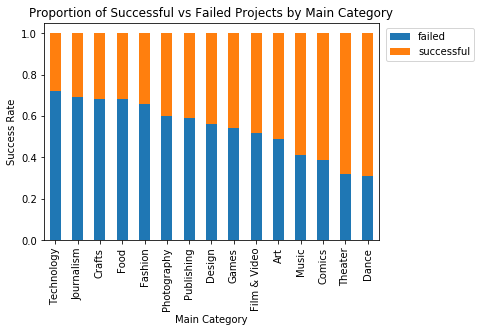

In [21]:
grouped = projects.groupby(['main_category','state']).ID.count()
total = projects.groupby('main_category').state.count()
prop = np.round((grouped/total),2).unstack().sort_values(by='successful')

prop.plot(kind='bar',stacked=True)
plt.title('Proportion of Successful vs Failed Projects by Main Category')
plt.ylabel('Success Rate')
plt.xlabel('Main Category')
plt.legend(loc='upper right',bbox_to_anchor=(1.3,1))
plt.show()

Top 3 categories with the highest success rates are Dance, Theater, and Comics. On the other hand, Technology, Journalism and Crafts have the lowest success rates. We continue to look at the number of projects in each category to see if there's any relationship.

### Frequency of Project v.s. Category

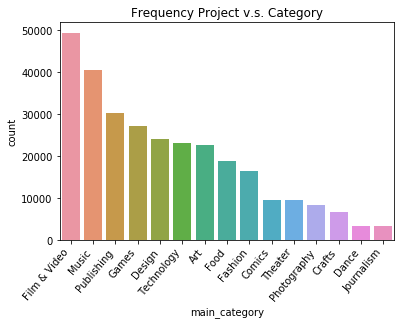

In [22]:
freq_category = sns.countplot(projects.main_category,order = projects['main_category'].value_counts().index)
freq_category.set_xticklabels(freq_category.get_xticklabels(), rotation=50,horizontalalignment='right')
freq_category.set_title("Frequency Project v.s. Category")
plt.show()

The most popular category on Kickstarter is Film & Video, followed by Music, Publishing, and Games. The least popular categories on Kickstarter are Journalism, Dance, and Crafts. We can see that the categories with the highest success rate are also categories with less number of projects (e.g. Dance). 

This lead us to wonder whether there is a relationship between number of projects and category success rate.

### Frequency of Project v.s. Category Success Rate 

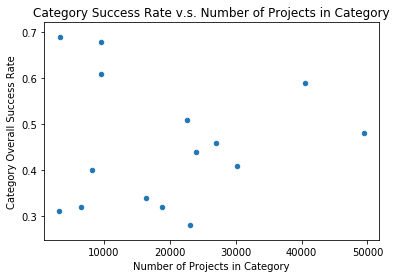

,success_rate,count
success_rate,1.000000,0.009556
count,0.009556,1.000000


In [23]:
df1 = pd.DataFrame({'category':prop.index.tolist(),'success_rate': prop.get('successful')})

df2 = pd.DataFrame({'category':projects.main_category.value_counts().index.tolist(),
                    'count': projects.main_category.value_counts()})

df3 = pd.merge(df1,df2)

df3.plot(kind='scatter',x='count',y='success_rate')
plt.title('Category Success Rate v.s. Number of Projects in Category')
plt.ylabel('Category Overall Success Rate')
plt.xlabel('Number of Projects in Category')
plt.show()

df3.corr()

There is no correlation between number of projects and category success rate.

### Average Goal v.s. Category (kc - i dont think this fits here) - REMOVE 

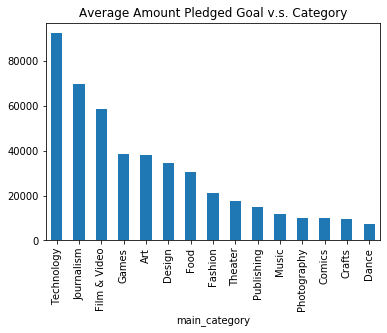

In [24]:
avg_pledged_goal = projects.groupby(['main_category']).usd_goal_real.mean().sort_values(ascending=False)
avg_pledged_goal
avg_pledged_goal.plot(kind="bar")
plt.title("Average Amount Pledged Goal v.s. Category")
plt.show()

In [25]:
When 

NameError: name 'When' is not defined

### Backers v.s. Category

In [ ]:
pledged = projects.groupby(['main_category']).backers.sum().sort_values(ascending=False)
pledged.plot(kind="bar")
plt.title("Number of Backers v.s. Category")
plt.show()

Categories with the most backers on Kickstarter are Games, Design, and Technology. This may imply that the general audience on Kickstarter are mostly interested in projects within these categories.

### Average Amount Pledged v.s. Category

In [ ]:
avg_pledged = projects.groupby(['main_category']).usd_pledged_real.mean().sort_values(ascending=False)
avg_pledged
avg_pledged.plot(kind="bar")
plt.title("Average Amount Pledged v.s. Category")
plt.show()

On avergae, there is more 

### Average Amount Pledged per Backer v.s. Category

In [ ]:
avg_pledged_backer = kickstarter_cleaned.groupby(['main_category']).pledged_per_backer.mean().sort_values(ascending=False)
avg_pledged_backer
avg_pledged_backer.plot(kind="bar")
plt.title("Average Amount Pledged per Backer v.s. Category")
plt.show()

### Guiding Question 2: Exploring Highly Successful Projects

In [ ]:
kickstarter_cleaned['percent_funded'].describe()

The median of <font color = 'blue'>percent_funded</font> is 0.275, which means that 50% of the projects on Kickstarter receive pledges that are 0.275 times their goal and the projects failed. This makes sense since __ of projects on Kickstarter fails as mentioned before.

In [ ]:
np.percentile(kickstarter_cleaned['percent_funded'],99)

The 99th percentile of projects with highest percentage funded relative to their goal is 12.496. Let's discover these projects that have really high funding!

In [ ]:
highly_funded = kickstarter_cleaned['percent_funded'] > 12.496
highly_funded_kickstarters = kickstarter_cleaned[highly_funded].sort_values(by='percent_funded',ascending=False)
highly_funded_kickstarters.head()

In [ ]:
highly_funded_kickstarters['usd_goal_real'].value_counts(sort=True).head(10)

We found that most projects with outlier success have very low goals, as low as 1. We look further into these projects with extremley low goals.

In [ ]:
low_goal.head()

In [ ]:
low_goal = highly_funded_kickstarters[highly_funded_kickstarters['usd_goal_real'] <= 10]
low_goal.main_category.value_counts()

Most projects with goals lower than 10 are in <font color = 'blue'>main_category</font> music, games, and art. We search up some of these projects and realized that they are not all meme projects. For instance, the creator of project **VULFPECK /// Thrill of the Arts** said that "I'm confident we will raise the necessary capital to make the album, so that's why I put the goal at $1. This is simply an invitation for anyone that wants to be part of the process!"

We found that there are many projects that have outlier success because their goals are too low. We take these projects out to see whether there is anything interesting with normal projects that do not have goal less than 50 dollars. 

In [ ]:
reasonable_goal = (kickstarter_cleaned['percent_funded'] > 12.496) & (kickstarter_cleaned['usd_goal_real'] >= 25)

new_highly_funded = kickstarter_cleaned[reasonable_goal]
new_highly_funded.sort_values(by='percent_funded',ascending=False).head()

In [ ]:
new_highly_funded.main_category.value_counts()

In [ ]:
grouped = new_highly_funded.groupby('main_category').ID.count()
total = kickstarter_cleaned.groupby('main_category').ID.count()
prop = (grouped/total).sort_values(ascending=False)
prop

top 1% performing projects with reasonable goals, make up 3% of projects in games.
interesting - more concentrated in Games and Design categories.
Design - miscalleaneous

In [ ]:
print(new_highly_funded.pledged_per_backer.mean())
print(kickstarter_cleaned.pledged_per_backer.mean())

### Guiding Question 3: What are some factors that may impact the outcome of a project?

### Average Project Goal by Main Category & State

In [ ]:
A = projects.groupby(['main_category','state']).usd_goal_real.median().unstack()
A.plot(kind='bar')
plt.title("Average Project Goal v.s. Category")
plt.ylabel("Average Project Goal")
plt.xlabel("Main Category")
plt.show()

We can see that successful projects tend to have lower median of <font color = 'blue'>usd_goal_real</font> than that of failed projects across all categories.

### Average Pledged per Backer by Main Category & State

In [ ]:
A = projects.groupby(['main_category','state']).pledged_per_backer.mean().unstack()
A.plot(kind="bar") 
plt.title("Average pledged per Backer by Category")
plt.ylabel("Average Pledged per Backer")
plt.xlabel("Main Category")
plt.show()

We can see that the average <font color = 'blue'>pledged_per_backer</font> is higher for successful projects across all categories.

Project Length

In [ ]:
avgPledgePerBackerbyLength = new_kickstarter_cleaned.groupby('project_length')['pledged_per_backer']
avgPledgePerBackerbyLength.mean().plot(kind = 'bar')
plt.title('Average Pledge Amount by Project Length')
plt.show()

In [ ]:
avgPledgedbyLength = new_kickstarter_cleaned.groupby('project_length')['usd_pledged_real']
avgPledgedbyLength.mean().plot(kind = 'bar')
plt.title('Average Pledged Total by Project Length')
plt.show()

In [ ]:
avgBackersbyLength = new_kickstarter_cleaned.groupby('project_length')['backers']
avgBackersbyLength.mean().plot(kind = 'bar')
plt.title('Average Backer Total by Project Length')
plt.show()

In [ ]:
avgLengthByState = new_kickstarter_cleaned.groupby('state')['project_length']
avgLengthByState.mean().plot(kind = 'bar')
plt.title('Average Project Length per State')
plt.show()

In [ ]:
new_kickstarter_cleaned['project_length'].describe()

# Data Modeling

In [ ]:
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression,LassoCV

In order to preprocess our data for modeling whether a project will be 'successful' or 'failed', we will have to filter our dataset to only include projects with the feature <font color = 'blue'>state</font> equal to one of these two. Because of the nature of the smf module, we will gave to convert the values to 1 or 0.

In [ ]:
clean_state = {'state': {'failed': 0, "successful": 1}}
kickstarter_cleaned.replace(clean_state, inplace=True)
kickstarter_fail_successful = kickstarter_cleaned[(kickstarter_cleaned.state == 1) | (kickstarter_cleaned.state == 0)] 

(TO BE CONFIRMED) We have also filtered the data to only include projects with <font color = 'blue'>main_category</font> equal to 'Games'. This allows us to create a less computationally expensive model and a model that can identify important subcategories (the feature <font color = 'blue'>category</font>) within the 'Games' <font color = 'blue'>main_category</font>.

In [ ]:
kickstarter_games = kickstarter_fail_successful[kickstarter_fail_successful['main_category'] == 'Games']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(kickstarter_games[['ID','name','category','main_category','currency','deadline','launched','backers','country','usd_pledged_real','usd_goal_real','project_length','pledged_per_backer']],kickstarter_games[['state']], test_size=0.3)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

y_train['state'] = y_train.state.apply(int)
y_test['state'] = y_test.state.apply(int)

In [ ]:
logitmodel = smf.logit(formula = 'state ~ category + usd_goal_real + project_length + pledged_per_backer', data = pd.concat([X_train, y_train], axis=1))
results = logitmodel.fit()
print(results.summary())

In [ ]:
testresult_logit = results.predict(X_test)
testresult_logit = np.where(testresult_logit > 0.5, 1, 0)
np.mean(testresult_logit == y_test.state.to_numpy()) #~70% accuracy on test dataset

In [ ]:
y_test.state.value_counts().iloc[0]/(y_test.state.value_counts().iloc[0] + y_test.state.value_counts().iloc[1])

After splitting our results into a train and test set, we obtain an accuracy of ~70% on the test dataset. TO DO: Crossvalidation to verify our results (but based on running this code multiple times the 70% appears to hold steady). This result is indeed significant, as our model predictions represent a noticeable improvement in accuracy (compared to merely predicting 'failed' or 'successful' for all of the test data, ~53%)